[![Open In Colab](https://colab.research.google.com/assets/colab-badge.svg)](https://colab.research.google.com/github/FerneyOAmaya//Photonics/blob/master/ReflexionRefraccion.ipynb)

# Reflexión y refracción

Se analiza la reflexión y transmisión de ondas entre medios dieléctricos empleando la Ley de Snell y las Ecuaciones de Fresnel.

Por:

Ferney Amaya Fernández
https://ferneyoamaya.github.io/


Contenido:
1. Reflexión y transmisión.
2. Ángulos de reflexión y transmisión.
3. Ecuaciones de Fresnel.
4. Ejercicio interactivo.
<br>Referencias.

## 1.Reflexión y transmisión.

Para el estudio de la propagación de una onda electromagnética a través de medios, deben analizarse tres ondas:
- Onda incidente: se designa con el subíndice $i$.
- Onda reflejada: se designa con el subíndice $r$.
- Onda transmitida o refractada: se designa con el subíndice $t$.

Para conocer las características de las ondas reflejada y transferida se requiere conocer:
- De la onda incidente su **frecuencia**  $\omega_i$, su modo y su **ángulo de incidencia** $\theta_i$ en la interface entre los medios. 
- De los medios requerimos conocer sus **índices de refracción** $n_1$ y $n_2$.

En cuanto al modo, se requiere saber si la onda es TM (Transversal Megnética) o TE (Transversal Eléctrica).

Debe tenerse en cuenta que los ángulos se medirán respecto a la normal.

En a Tabla 1 se presentan las características de la onda que cambian cuando esta cambia de medio.

|Característica|Cambia?|
|:-|:-:|
|Frecuencia|NO|
|Amplitud|SI|
|Velocidad fase|SI|
|Longitud de onda|SI|
|Ángulo|SI|

<br>

Como se observa en la tabla, la frecuencia de la onda no cambia:
$$\large \omega_i = \omega_r = \omega_t$$








## 2.Ángulos de reflexión y transmisión.

El ángulo de la onda incidente es igual al de la onda reflejada:
$$\large \theta_i = \theta_r$$

Para calcular la relación entre los ángulos de la onda incidente y reflejada se emplea la Ley de Snell:

$$\large n_1 sin(\theta_i) = n_2 sin(\theta_t)$$
<br>
El **ángulo crítico** es el ángulo incidente a partir del cual no se tiene onda transferida o refractada, se calcula como:

$$\large \theta_c = sin^{-1} (n_1 / n_2)$$

## 3.Ecuaciones de Fresnel.

Las ecuaciones de Fresnel permiten calcular el cambio en intensidad de la onda al cambiar de medio.

Los coeficientes de reflexión para los modos TM y TE se calculan de la siguiente forma:

$$\large r_{TM} = \frac{n_2 cos \theta_i - n_1 cos \theta_t}{n_2 cos \theta_i + n_1 cos \theta_t}  $$ <br>

$$\large r_{TE} = \frac{n_1 cos \theta_i - n_2 cos \theta_t}{n_1 cos \theta_i + n_2 cos \theta_t}  $$

Los coeficientes de transmisión para los modos TM y TE se calculan de la siguiente forma:

$$\large t_{TM} = \frac{2n_1 cos \theta_i}{n_1 cos \theta_t + n_2 cos \theta_i}  $$ <br>

$$\large t_{TE} = \frac{2n_1 cos \theta_i}{n_1 cos \theta_i + n_2 cos \theta_i}  $$ <br>

La reflectividad para los modos TM y TE:

$$\large R_{TM} = |r_{TM}|^2  $$ <br>
$$\large R_{TE} = |r_{TE}|^2  $$ <br>

La tramitancia para los modos TM y TE debe cumplir:

$$\large R_{TM} + T_{TM}  = 1 $$ <br>
$$\large R_{TE} + T_{TE}  = 1 $$ <br>

Como puede observarse, la reflectividad y la tramitancia varían entre 0 y 1, representando la proporción de onda transferida o reflejada.

**Ejercicios**

1. ¿Existe $sin^{-1}(2)$?
2. Calcular el ángulo de transmisión y el ángulo crítico en los siguientes casos:
 - La onda pasa del aire a vidrio ($n=1.5$) y el ángulo de incidencia es de 10°.
 - La onda pasa del vidrio al aire y el ángulo de incidencia es de 10°.
 - La onda pasa del vidrio al aire y el ángulo de incidencia es de 60°.

¿Qué puede concluir?

## 4.Ejercicio interactivo.

En el siguiente ejercicio se presenta como varía la onda reflejada dependiendo del ángulo incidente y del índice de refracción del segundo medio.

Se asume que la onda se propaga a través del vidrio ($n_1=1.5$) y pasa a otro medio en el cual puede cambiarse el índice de refracción.


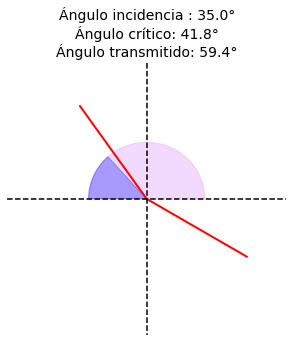

In [4]:
import matplotlib.patches as mpatches
import matplotlib.pyplot as plt
import numpy as np
Angulo_i = 35  #@param {type: "slider", min: 0, max: 90}
n2 = 1  #@param {type: "slider", min: 1, max: 2, step:0.1}

n1 = 1.5
ai = Angulo_i*np.pi/180

if n1>n2:
  #La onda se contiene
  ac = np.arcsin(n2/n1)
  ac_graph = ac
  ac_text = 'Ángulo crítico: {:.1f}°'.format(ac*180/np.pi)
  if ai < ac:
    at = np.arcsin(n1*np.sin(ai)/n2)
  else:
    at = np.pi/2
else:
   #La onda NO se contiene
   ac_graph = -np.pi/2
   ac_text = 'Ángulo crítico: No aplica'
   at = np.arcsin(n1*np.sin(ai)/n2)

ai_text = 'Ángulo incidencia : {:.1f}°'.format(ai*180/np.pi)
at_text = 'Ángulo transmitido: {:.1f}°'.format(at*180/np.pi)
tit_text = ai_text + '\n' + ac_text + '\n' + at_text 

yi = np.cos(ai)
xi = np.sin(ai)
yr = np.cos(at)
xr = np.sin(at)

fig, ax = plt.subplots(figsize=(5,5))

wed_sem = mpatches.Wedge((0, 0), 0.5, 0, 180, color='#d187f5', alpha=0.3)
wed_cri = mpatches.Wedge((0, 0), 0.5, 90+ac_graph*180/np.pi, 180, color='b', alpha=0.3)
ax.add_patch(wed_sem)
ax.add_patch(wed_cri)

ax.plot([-np.abs(xi),0],[np.abs(yi),0],'r',lw=2)
ax.plot([np.abs(xr),0],[-np.abs(yr),0],'r',lw=2)
ax.plot([-1.2,1.2],[0,0],'k--')
ax.plot([0,0],[1.2,-1.2],'k--')
ax.axis([-1.2,1.2,-1.2,1.2])
ax.set_title(tit_text, fontsize=14)
ax.axis('off')
fig.show()